# Analyzing and Handling Missing Data from a Stack Overflow Survey

A portfolio project completed for my Codecademy Data Scientist: Machine Learning Engineer certification.

Robert Hall
Began 05/17/2024

### Step 1: Import the data and develop some observations

In [18]:
# import libraries to be used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# retrieve data from CSV and convert into DataFrame
data = pd.read_csv('developer_dataset.csv')
print(data.columns)

# warning about mixed datatypes will be addressed further down

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


C:\Users\rhall\AppData\Local\Temp\ipykernel_7796\441863751.py:2: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('developer_dataset.csv')


In [20]:
# print the first 5 rows of each column to get overview of tabular structure
data.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


In [21]:
# return counts of non-null data points in each feature
data.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [22]:
# print descriptive statistics for all numerical columns
data.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


### Step 2: Delete missing data in rows with > 60% missing values

In [23]:
# determine percentage missing data
total_rows = data['RespondentID'].count()

missing_data = round((1 - data.count() / total_rows) * 100, 2)

print("Percent Missing Data")
print(missing_data)

Percent Missing Data
RespondentID               0.00
Year                       0.00
Country                    0.00
Employment                 1.60
UndergradMajor            11.47
DevType                    9.69
LanguageWorkedWith         8.26
LanguageDesireNextYear    13.64
DatabaseWorkedWith        22.79
DatabaseDesireNextYear    33.25
PlatformWorkedWith        17.62
PlatformDesireNextYear    23.23
Hobbyist                  38.54
OrgSize                   50.72
YearsCodePro              14.76
JobSeek                   45.55
ConvertedComp             17.87
WorkWeekHrs               54.06
NEWJobHunt                82.80
NEWJobHuntResearch        83.20
NEWLearn                  78.22
dtype: float64


In [24]:
data_to_remove = missing_data >= 60.0
print(data_to_remove)

RespondentID              False
Year                      False
Country                   False
Employment                False
UndergradMajor            False
DevType                   False
LanguageWorkedWith        False
LanguageDesireNextYear    False
DatabaseWorkedWith        False
DatabaseDesireNextYear    False
PlatformWorkedWith        False
PlatformDesireNextYear    False
Hobbyist                  False
OrgSize                   False
YearsCodePro              False
JobSeek                   False
ConvertedComp             False
WorkWeekHrs               False
NEWJobHunt                 True
NEWJobHuntResearch         True
NEWLearn                   True
dtype: bool


In [25]:
# drop NEWJobHunt, NEWJobHuntResearch and NEWLearn from the dataframe
data.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
          axis=1,
          inplace=True)

data.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141000.0,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,AWS;Docker;Linux;MacOS;Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,NaN,4.0,NaN,48000.0,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0


### Step 3. Analyze developers by country of origin

In [26]:
data[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [27]:
# develop a table of null-value quantities for the Employment and DevType columns, grouped by Country
missing_data = data[['Employment', 'DevType']].isnull().groupby(data['Country']).sum().reset_index()
missing_data

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


Text(0.5, 0.98, 'Missing Data in Developer Type Column with respect to Country of Origin')

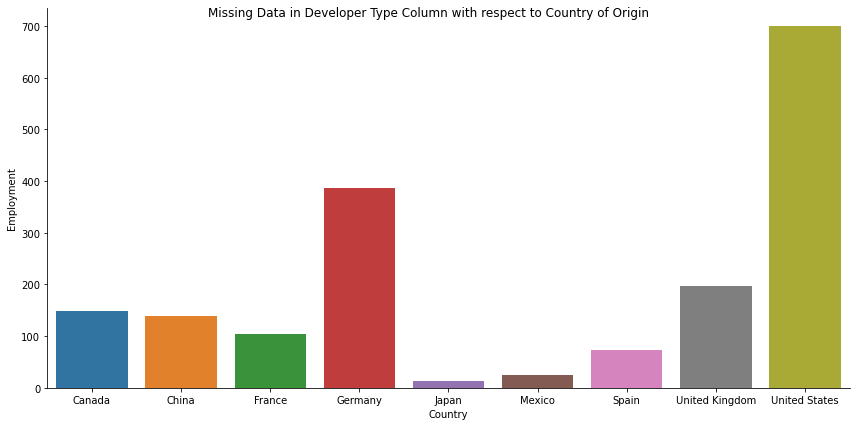

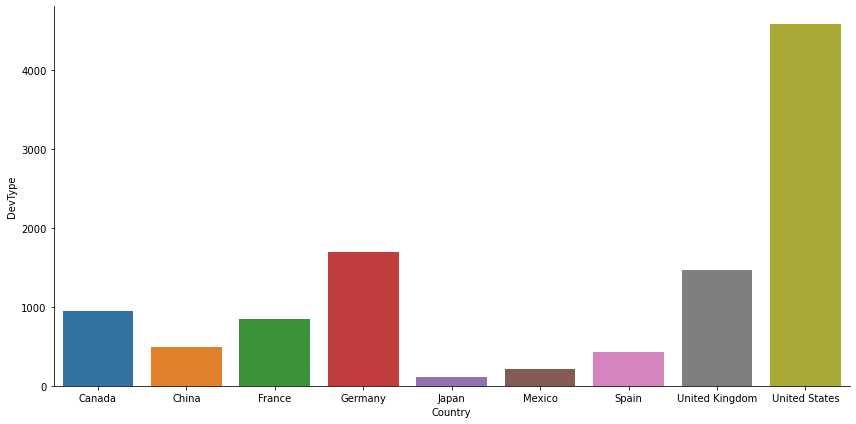

In [30]:
# plot the amount of missing data in the Employment and Developer Type (DevType)
# columns, grouped by country of origin.

data[['RespondentID','Country']].groupby('Country').count()

missingData = data[['Employment','DevType']].isnull().groupby(data['Country']).sum().reset_index()

A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
A.figure.suptitle("Missing Data in Employment Column with respect to Country of Origin")
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)
A.figure.suptitle("Missing Data in Developer Type Column with respect to Country of Origin")

Missing data in each country is roughly proportional to the size of the country represented in the sample, therefore the missing data in these columns is, most likely, missing completely at random.

### Step 4: Drop missing data from MCAR Employment and Developer Type (DevType) columns using pairwise deletion

In [36]:
data.dropna(subset=['Employment', 'DevType'],
            inplace=True,
            how='any')

# Display sum total of missing data in the two columns, grouped by country of origin
data[['Employment', 'DevType']].isnull().groupby(data['Country']).sum().reset_index()

,Country,Employment,DevType
0,Canada,0,0
1,China,0,0
2,France,0,0
3,Germany,0,0
4,Japan,0,0
5,Mexico,0,0
6,Spain,0,0
7,United Kingdom,0,0
8,United States,0,0


### Step 5: Determine the quantities of a given developer type present in each country

In [38]:
# create an isolated dataframe with only the necessary data for this task
dev_data = data[['Country', 'DevType']]
dev_data.head()

,Country,DevType
0,United States,Engineering manager;Full-stack developer
1,United States,"Developer, full-stack"
3,United States,Full-stack developer
4,United States,Data or business analyst;Database administrato...
5,United States,"Developer, back-end;Developer, desktop or ente..."


In [ ]:
dev_data.loc[dev_data['DevType'].str.contains('back-end'), 'BackEnd'] = True
dev_data.loc[dev_data['DevType'].str.contains('front-end'), 'FrontEnd'] = True
dev_data.loc[dev_data['DevType'].str.contains('full-stack'), 'FullStack'] = True
dev_data.loc[dev_data['DevType'].str.contains('mobile'), 'Mobile'] = True
dev_data.loc[dev_data['DevType'].str.contains('administrator'), 'Admin'] = True